In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
import pickle

import sys
sys.path.append('../')

from utils import draw
from modules import HandwritingSynthesisNetwork, HandwritingPredictionNetwork
from dataset import HandwritingDataset
import torch

### 1. Load the Handwriting dataset

In [29]:
root = Path('../logs/retrain_seqlen_256')
args = pickle.load(open(root / "args.pkl", "rb"))

dataset = HandwritingDataset('../' + args.path, split='test')

### 2. Load the Handwriting Synthesis Network

In [19]:
model = HandwritingSynthesisNetwork(
    test_dataset.vocab_size,
    args.dec_hidden_size, args.dec_n_layers,
    args.n_mixtures_attention, args.n_mixtures_output
).cuda()
model.load_state_dict(torch.load(root / 'model.pt'))

### 3. Generate handwriting for given input text

Enter input: pytorch handwriting synthesis


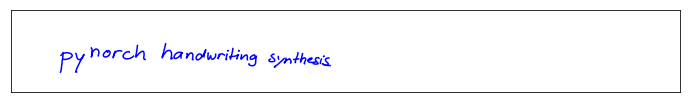

In [28]:
string = input("Enter input: ") + " "

chars = torch.from_numpy(
    dataset.sent2idx(string)
).long()[None].cuda()
chars_mask = torch.ones_like(chars).float().cuda()

with torch.no_grad():
    out = model.sample(chars, chars_mask, maxlen=2000)[0].cpu().numpy()

_ = draw(out[0], save_file=None)

### 4. Load the Handwriting Prediction Network

In [34]:
root = Path('../logs/new_code_uncond_256')
args = pickle.load(open(root / "args.pkl", "rb"))

model = HandwritingPredictionNetwork(
    args.dec_hidden_size, args.dec_n_layers,
    args.n_mixtures_output
).cuda()
model.load_state_dict(torch.load(root / 'model.pt'))

### 5. Generate unconditional handwriting

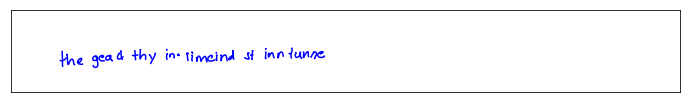

In [35]:
with torch.no_grad():
    out = model.sample(batch_size=1).cpu().numpy()

_ = draw(out[0], save_file=None)